# Advanced Matplotlib Graphing Assignment

- Dane Wertz
- BUAD 5112 (AA)
- 9/19/2021

I start off by importing the packages used in the creation of this graph and enabling the Matplotlib graph to be embedded in the Jupyter notebook. After this the data was read in from the csv source file.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')

### Data Manipulation

I start by creating a new DataFrame, "splitdf", containing the results of splitting the "Month-Year" column from the original DataFrame on the hyphen. At this point I keep the data type as a string and concatenate "20" to the front of the year value in each row. Once that is complete and the newly created "Year" column is in YYYY format, I convert the data type to an integer and append the new column to the original DataFrame where it can be used to group the spending data.

In [78]:
splitdf= df['Month-Year'].str.split(pat = '-', n = -1, expand = True) # Split "Month-Year" at the hyphen
splitdf['Year'] = '20' + splitdf[1].astype(str) # Concatenate to take year format from YY to YYYY
splitdf['Year'] = splitdf['Year'].astype(int)
df['Year'] = splitdf['Year'] # Add new column to original DataFrame
print(df)

     Month Month-Year  Total Construction  Private Construction  \
0        1     Jan-02               59516                 45273   
1        2     Feb-02               58588                 44475   
2        3     Mar-02               63782                 49396   
3        4     Apr-02               69504                 53283   
4        5     May-02               73384                 55009   
..     ...        ...                 ...                   ...   
139    140     Aug-13               85677                 57481   
140    141     Sep-13               85383                 58297   
141    142     Oct-13               85193                 59370   
142    143     Nov-13               77931                 55191   
143    144     Dec-13               71502                 52132   

     Public Construction  Year  
0                  14243  2002  
1                  14113  2002  
2                  14386  2002  
3                  16221  2002  
4                  18375  2002

First, I drop the 2014 data from the original DataFrame as it only contains two months' worth of data and is relatively useless in the graphed data that is being observed. Then the spending data from both Private and Public sectors are grouped by the year that the spending occured in, and saved in a new DataFrame called "grouped". This DataFrame forms the basis for the chart below.

In [75]:
df = df.iloc[:-2] # Remove 2014 partial data from graph
grouped = df.groupby('Year')['Private Construction', 'Public Construction'].sum() # Group spending data by year
print(grouped)
print(df)

      Private Construction  Public Construction
Year                                           
2002                634439               213438
2003                675375               216127
2004                771175               220184
2005                869978               234160
2006                911837               255387
2007                863278               289074
2008                758826               308738
2009                588308               314895
2010                500596               303968
2011                501609               286407
2012                577930               279023
2013                628517               271434
     Month Month-Year  Total Construction  Private Construction  \
0        1     Jan-02               59516                 45273   
1        2     Feb-02               58588                 44475   
2        3     Mar-02               63782                 49396   
3        4     Apr-02               69504                 53

<ipython-input-75-12d1bcca4c9c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby('Year')['Private Construction', 'Public Construction'].sum()


### Graph

Below I create a grouped bar chart in order to show trends in the public and private construction spending on a year-by-year basis. Aspects of both the original DataFrame and the "grouped" DataFrame are used in the creation of the visualization.

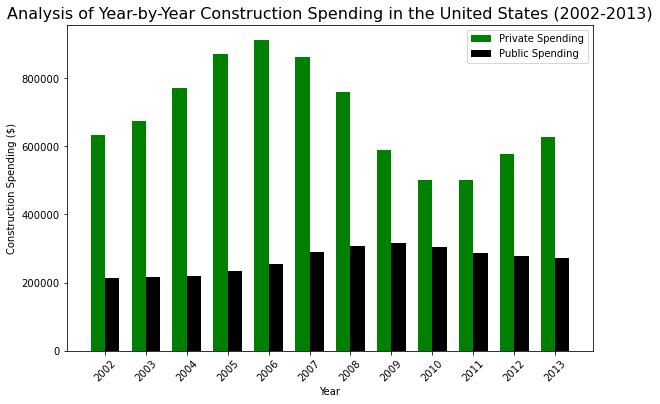

In [82]:
x = np.arange(len(pd.unique(df['Year'])))  # The locations of the labels are set
width = 0.35  # The width of the bars are parameterized

fig, ax = plt.subplots()
# The grouped bars are created for each sector and the spacing is parameterized
rects1 = ax.bar(x - width/2, grouped['Private Construction'], width, label='Private Spending', color='g')
rects2 = ax.bar(x + width/2, grouped['Public Construction'], width, label='Public Spending', color='k')

# Label text added, title added, x ticks are set and labeled, and a legend is added
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending ($)')
ax.set_title('Analysis of Year-by-Year Construction Spending in the United States (2002-2013)', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(pd.unique(df['Year']))
ax.legend()

# Graph is formatted and resized
fig.tight_layout()
fig.set_size_inches(9, 6)

plt.xticks(rotation = 45) # x-axis labels are rotated for a neater presentation
plt.show()

### Analysis

There were many interesting observations that I made while working with the data in the Time Series Decompositon Assignment, but I chose to focus on just one for this assignment. While working on the data, I noticed that as private spending begins to decrease, the public spending begins to increase, then the trends flip as the private spending begins to level out and surge once again. My initial thoughts were that these trends were a result of the economic conditions of the time and the Great Recession that occurred between December 2007 and June 2009. While I acknowledge that those numbers are certainly affected by the economic conditions of the time, particularly in the private sector where it would have been much more expensive to borrow money, I noticed that political conditions in the United States would better explain the trends as it fits the timeline better.

When looking at the data available on the history section of the House of Representatives website, both the legislative and executive branches were controlled by the Republican Party from 2002-2006. Generally, when the Republican Party controls the Federal Government, we see increases in spending by private businesses and a lack of public spending. This trend holds true in the construction spending data. In the 2006 election cycle, Republicans lost both branches of the legislature, Democrats took over and we begin to see less favorable conditions for private spending and increased government spending. These trends hold true in the data as well and is perhaps exacerbated by the recession hitting the nation in late 2007. The Democrats would control both the legislative and executive branches of the government from 2008-2010, in the 2010 election cycle, Republicans would win back the majority in the House of Representatives and we begin to see the trends reverse. Again, the improving economic conditions in the nation definitely factor into these trends, but I believe that the chart above shows timelines that correspond more closely with political shifts than with the economy.

## Sources

Party government since 1857. US House of Representatives: History, Art &amp; Archives. (n.d.). Retrieved September 19, 2021, from https://history.house.gov/Institution/Presidents-Coinciding/Party-Government/. 